In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
data = pd.read_csv('Sales Prediction.csv')

In [3]:
print(data.head(10))

     TV      Radio  Social Media Influencer       Sales
0  16.0   6.566231      2.907983       Mega   54.732757
1  13.0   9.237765      2.409567       Mega   46.677897
2  41.0  15.886446      2.913410       Mega  150.177829
3  83.0  30.020028      6.922304       Mega  298.246340
4  15.0   8.437408      1.405998      Micro   56.594181
5  29.0   9.614382      1.027163       Mega  105.889148
6  55.0  24.893811      4.273602      Micro  198.679825
7  31.0  17.355042      2.289855       Nano  108.733932
8  76.0  24.648898      7.130116      Macro  270.189400
9  13.0   0.431128      2.229423       Mega   48.280582


In [4]:
print(data.info)

<bound method DataFrame.info of         TV      Radio  Social Media Influencer       Sales
0     16.0   6.566231      2.907983       Mega   54.732757
1     13.0   9.237765      2.409567       Mega   46.677897
2     41.0  15.886446      2.913410       Mega  150.177829
3     83.0  30.020028      6.922304       Mega  298.246340
4     15.0   8.437408      1.405998      Micro   56.594181
...    ...        ...           ...        ...         ...
4567  26.0   4.472360      0.717090      Micro   94.685866
4568  71.0  20.610685      6.545573       Nano  249.101915
4569  44.0  19.800072      5.096192      Micro  163.631457
4570  71.0  17.534640      1.940873      Macro  253.610411
4571  42.0  15.966688      5.046548      Micro  148.202414

[4572 rows x 5 columns]>


In [5]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]

TV              0.218723
Radio           0.087489
Social Media    0.131234
Influencer      0.000000
Sales           0.131234
dtype: float64

In [6]:
#drop rows with missing values
data = data.dropna()

In [7]:
#convert values of Influencer feature into values
data['Influencer']=data['Influencer'].replace({'Mega':4,'Micro':1,'Macro':3,'Nano':2})

In [8]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,4,54.732757
1,13.0,9.237765,2.409567,4,46.677897
2,41.0,15.886446,2.913410,4,150.177829
3,83.0,30.020028,6.922304,4,298.246340
4,15.0,8.437408,1.405998,1,56.594181
5,29.0,9.614382,1.027163,4,105.889148
6,55.0,24.893811,4.273602,1,198.679825
7,31.0,17.355042,2.289855,2,108.733932
8,76.0,24.648898,7.130116,3,270.189400
9,13.0,0.431128,2.229423,4,48.280582


In [9]:
data.isnull().sum()*100/data.shape[0] #now data without missing values

TV              0.0
Radio           0.0
Social Media    0.0
Influencer      0.0
Sales           0.0
dtype: float64

In [10]:
print(data.describe())

                TV        Radio  Social Media   Influencer        Sales
count  4546.000000  4546.000000   4546.000000  4546.000000  4546.000000
mean     54.062912    18.157533      3.323473     2.498900   192.413332
std      26.104942     9.663260      2.211254     1.123457    93.019873
min      10.000000     0.000684      0.000031     1.000000    31.199409
25%      32.000000    10.555355      1.530822     1.000000   112.434612
50%      53.000000    17.859513      3.055565     2.000000   188.963678
75%      77.000000    25.640603      4.804919     4.000000   272.324236
max     100.000000    48.871161     13.981662     4.000000   364.079751


In [11]:
print(data.shape)

(4546, 5)


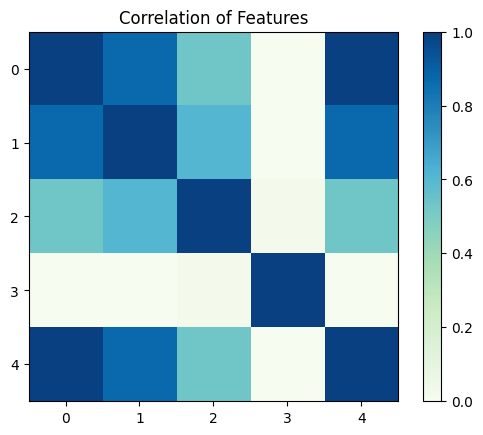

In [12]:
plt.imshow(data.corr(),cmap='GnBu',interpolation='nearest')
plt.colorbar()
plt.title('Correlation of Features')
plt.show()

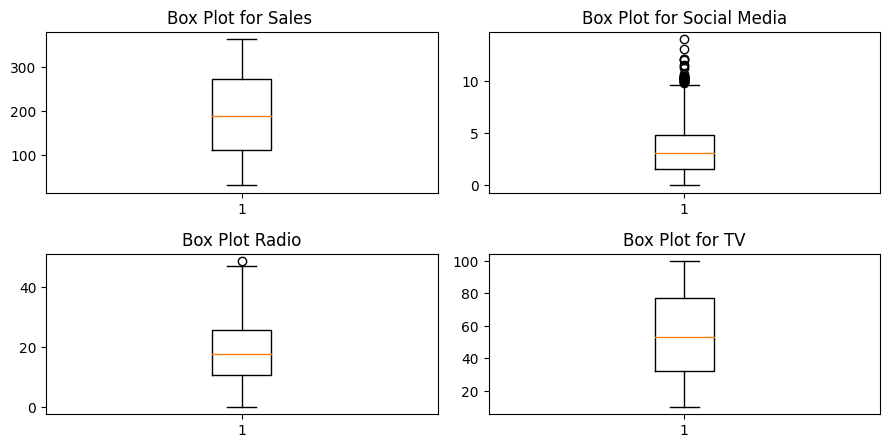

In [13]:
fig = plt.figure(figsize=(9,11))
ax1 = fig.add_subplot(5,2,1)
ax1.boxplot(data['Sales'])
ax1.set_title('Box Plot for Sales ')

ax2 = fig.add_subplot(5,2,2)
ax2.boxplot(data['Social Media'])
ax2.set_title('Box Plot for Social Media')

ax3 = fig.add_subplot(5,2,3)
ax3.boxplot(data['Radio'])
ax3.set_title('Box Plot Radio')

ax4 = fig.add_subplot(5,2,4)
ax4.boxplot(data['TV'])
ax4.set_title('Box Plot for TV')

plt.tight_layout()
plt.show()

In [14]:
#remove outliers from dataset
# outlier treatment for dataset
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data['Radio'].quantile(0.25)
Q3 = data['Radio'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Radio'] >= Q1 - 1.5*IQR) & (data['Radio'] <= Q3 + 1.5*IQR)] # drop rows that include outliers

Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Sales'] >= Q1 - 1.5*IQR) & (data['Sales'] <= Q3 + 1.5*IQR)] # drop rows that include outliers

Q1 = data['Social Media'].quantile(0.25)
Q3 = data['Social Media'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Social Media'] >= Q1 - 1.5*IQR) & (data['Social Media'] <= Q3 + 1.5*IQR)] # drop rows that include outliers


In [15]:
data.shape

(4517, 5)

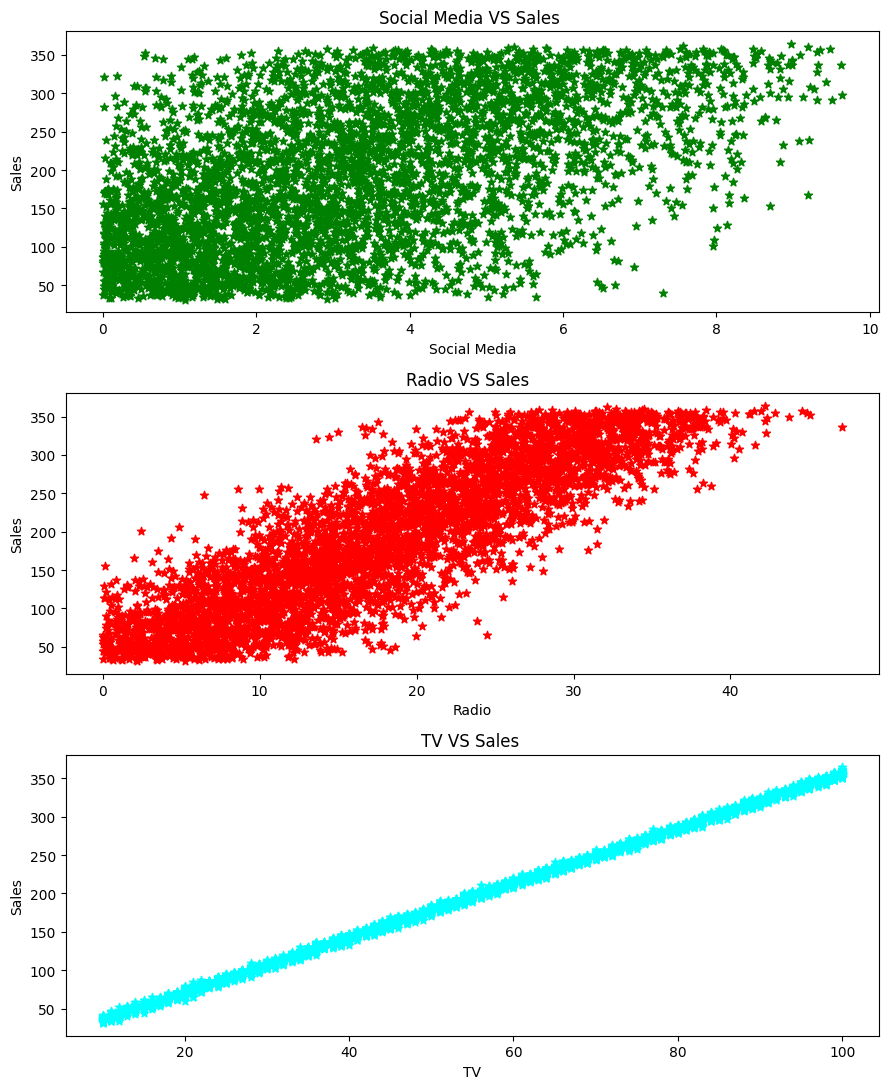

In [16]:
fig = plt.figure(figsize=(9,11))
ax1 = fig.add_subplot(3,1,1)
ax1.scatter(data['Social Media'],data['Sales'],marker='*' ,color='green')
ax1.set_title('Social Media VS Sales ')
ax1.set_xlabel('Social Media')
ax1.set_ylabel('Sales')

ax2 = fig.add_subplot(3,1,2)
ax2.scatter(data['Radio'],data['Sales'],marker='*' ,color='red')
ax2.set_title('Radio VS Sales  ')
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')

ax3 = fig.add_subplot(3,1,3)
ax3.scatter(data['TV'],data['Sales'],marker='*' ,color='cyan')
ax3.set_title('TV VS Sales ')
ax3.set_xlabel('TV')
ax3.set_ylabel('Sales')

plt.tight_layout()
plt.show()

In [17]:
print(data.head(15))

      TV      Radio  Social Media  Influencer       Sales
0   16.0   6.566231      2.907983           4   54.732757
1   13.0   9.237765      2.409567           4   46.677897
2   41.0  15.886446      2.913410           4  150.177829
3   83.0  30.020028      6.922304           4  298.246340
4   15.0   8.437408      1.405998           1   56.594181
5   29.0   9.614382      1.027163           4  105.889148
6   55.0  24.893811      4.273602           1  198.679825
7   31.0  17.355042      2.289855           2  108.733932
8   76.0  24.648898      7.130116           3  270.189400
9   13.0   0.431128      2.229423           4   48.280582
10  62.0  24.345189      5.151483           2  224.961019
11  42.0  15.807337      3.194925           4  145.543992
12  64.0  20.240424      3.921148           1  229.632381
14  34.0   0.226326      2.372706           2  121.336419
15  36.0   3.900196      0.060402           2  123.526113


In [18]:
y = np.array(data.pop('Sales').values)
x = np.array(data.values)

In [19]:
x= scale(x) #scale x before applying Regression models

In [20]:
#split data into 80% for training and 20% for testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [21]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3613, 4) (3613,) (904, 4) (904,)


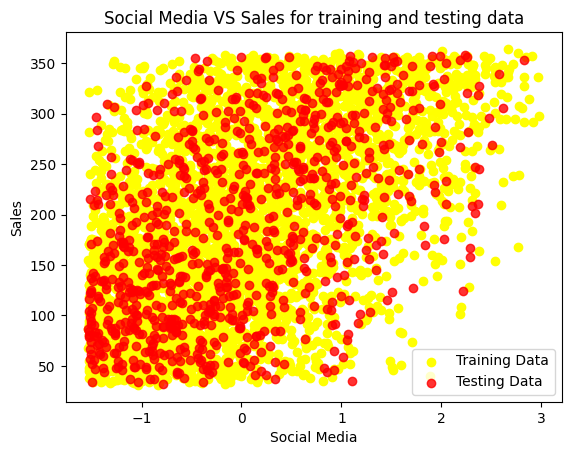

In [22]:
plt.scatter(x_train[:,2],y_train,color='yellow',label='Training Data',alpha=0.99)
plt.scatter(x_test[:,2],y_test,label='Testing Data',color='red',alpha=0.8)
plt.legend()
plt.xlabel('Social Media')
plt.ylabel('Sales')
plt.title('Social Media VS Sales for training and testing data')
plt.show()

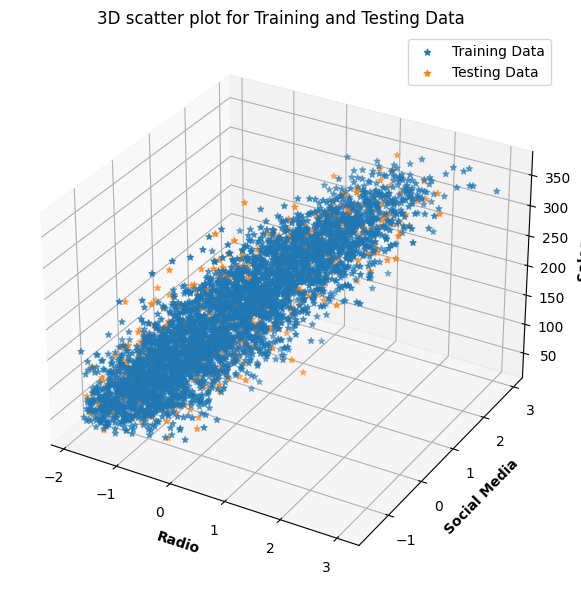

In [23]:
figure=plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

ax.scatter3D(x_train[:,1],x_train[:,2],y_train,label='Training Data',marker='*')
ax.scatter3D(x_test[:,1],x_test[:,2],y_test,label='Testing Data',marker='*')

ax.set_xlabel('Radio',fontweight='bold')
ax.set_ylabel('Social Media',fontweight='bold')
ax.set_zlabel('Sales',fontweight='bold')
plt.title('3D scatter plot for Training and Testing Data ')
plt.legend()
plt.tight_layout()
plt.show()

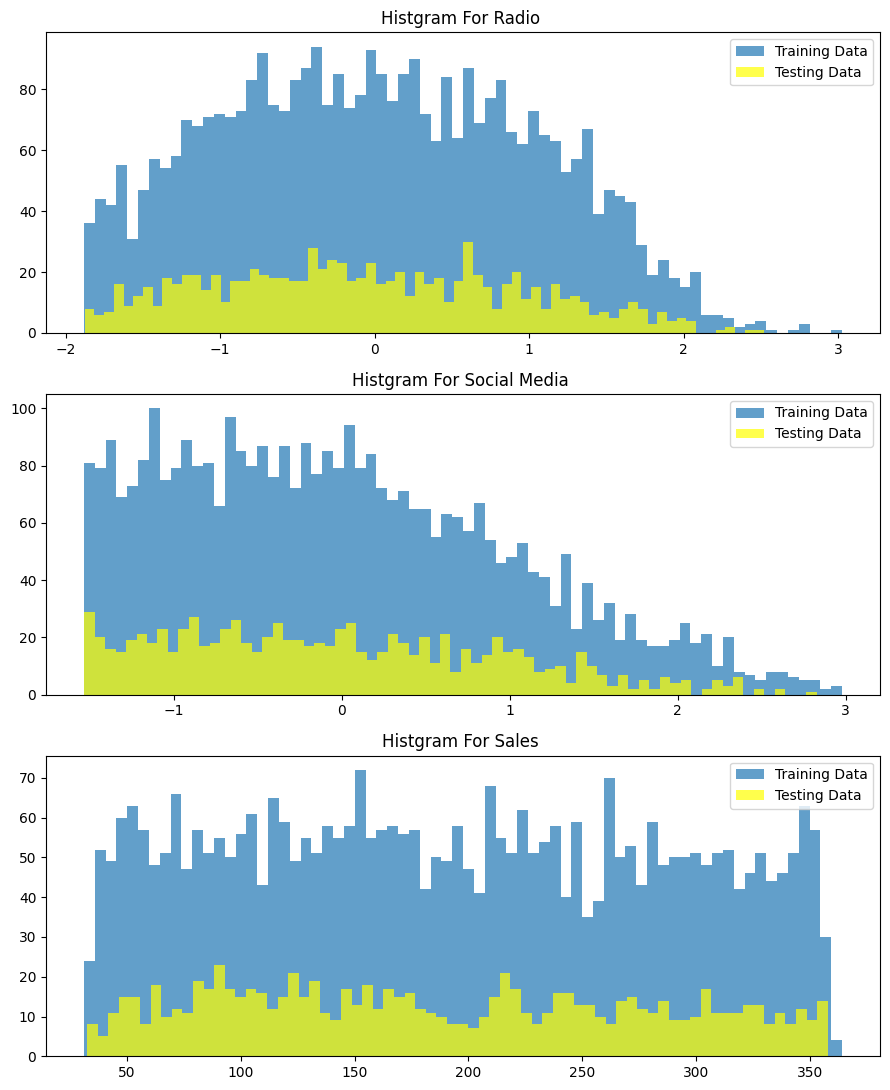

In [24]:


fig = plt.figure(figsize=(9,11))
ax1 = fig.add_subplot(3,1,1)

plt.hist(x_train[:,1],bins=70,histtype='bar',alpha=0.7,label='Training Data')
plt.hist(x_test[:,1],bins=70,alpha=0.7,label='Testing Data',color='yellow')
ax1.set_title('Histgram For Radio ')
ax1.legend()

ax2 = fig.add_subplot(3,1,2)
plt.hist(x_train[:,2],bins=70,histtype='bar',alpha=0.7,label='Training Data')
plt.hist(x_test[:,2],bins=70,alpha=0.7,label='Testing Data',color='yellow')
ax2.set_title('Histgram For Social Media ')
ax2.legend()

ax3 = fig.add_subplot(3,1,3)
plt.hist(y_train,bins=70,histtype='bar',alpha=0.7,label='Training Data')
plt.hist(y_test,bins=70,alpha=0.7,label='Testing Data',color='yellow')
ax3.set_title('Histgram For Sales ')
ax3.legend()

plt.tight_layout()
plt.show()

In [25]:
models_names = []
accuracies_of_models = []
mse_of_models = []
mae_of_models = []
med_ae_of_models = []

Weights :  [ 9.29365368e+01 -1.20152729e-01  7.19867546e-03  3.48820526e-02]
Bias :  191.70423811839674
Predicted Labels  :  [ 92.38579584 156.41919449 185.04453084  92.28824168  49.65737579
 160.10104314  96.05397083 299.20869527 274.07961929  85.25359232]
Accuracy :  99.90630757617008
Mean Square Error :  7.800012422526046
Mean Absolute Error :  2.2427886241851795
Median Absolute Error :  1.8923765315161063


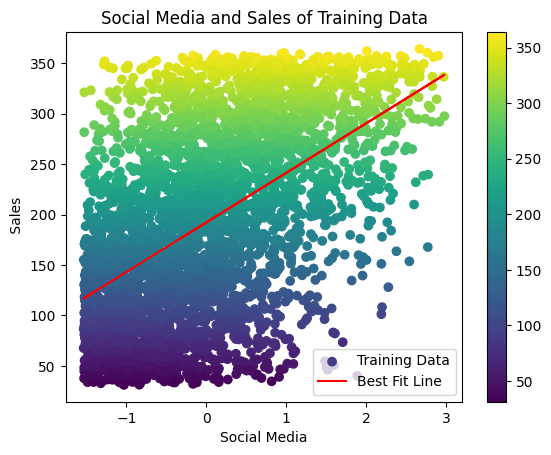

In [26]:
Linear_Regression_model = LinearRegression()
Linear_Regression_model.fit(x_train,y_train)

y_predicted_LR = Linear_Regression_model.predict(x_test)

weights_LR = Linear_Regression_model.coef_
bias_LR = Linear_Regression_model.intercept_

acc_LR= Linear_Regression_model.score(x_test,y_test)
mse_LR = mean_squared_error(y_test,y_predicted_LR)
mae_LR = mean_absolute_error(y_test,y_predicted_LR)
med_ae_LR = median_absolute_error(y_test,y_predicted_LR)


models_names.append('Linear Regression')
accuracies_of_models.append(acc_LR*100)
mse_of_models.append(mse_LR)
mae_of_models.append(mae_LR)
med_ae_of_models.append(med_ae_LR)

print('Weights : ' , weights_LR)
print('Bias : ' , bias_LR)
print('Predicted Labels  : ' , y_predicted_LR[:10])
print('Accuracy : ' , acc_LR*100)
print('Mean Square Error : ' , mse_LR)
print('Mean Absolute Error : ' , mae_LR)
print('Median Absolute Error : ' , med_ae_LR)

plt.scatter(x_train[:,2],y_train,c=y_train,label='Training Data')
m,b=np.polyfit(x_train[:,2],y_train,1) # for draw best fit line , m is the slope of line and b is the intercopt for y axis
plt.plot(x_train[:,2],m*x_train[:,2]+b,color='red',label='Best Fit Line')
plt.xlabel('Social Media')
plt.ylabel(' Sales')
plt.title('Social Media and Sales of Training Data')
plt.legend()
plt.colorbar()
plt.show()

Weights :  [91.94205045  0.          0.          0.        ]
Bias :  191.71099023642336
Predicted Labels  :  [ 93.35617224 156.87202835 185.10129773  93.35617224  51.01226816
 160.40068702  96.88483091 298.01837527 273.31776456  86.29885489]
Accuracy :  99.9013204087102
Mean Square Error :  8.215200401980914
Mean Absolute Error :  2.3159181091568977
Median Absolute Error :  2.095426775250573


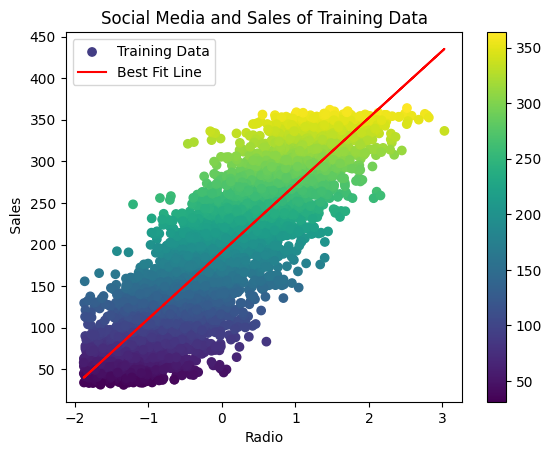

In [27]:
Linear_Regression_l1_reg_model = Lasso(alpha=0.9,max_iter=1000)
Linear_Regression_l1_reg_model.fit(x_train,y_train)

y_predicted_LR_L1 = Linear_Regression_l1_reg_model.predict(x_test)

weights_LR_L1 = Linear_Regression_l1_reg_model.coef_
bias_LR_L1 = Linear_Regression_l1_reg_model.intercept_

acc_LR_L1= Linear_Regression_l1_reg_model.score(x_test,y_test)
mse_LR_L1 = mean_squared_error(y_test,y_predicted_LR_L1)
mae_LR_L1 = mean_absolute_error(y_test,y_predicted_LR_L1)
med_ae_LR_L1 = median_absolute_error(y_test,y_predicted_LR_L1)


models_names.append('Linear Regression Lasso')
accuracies_of_models.append(acc_LR_L1*100)
mse_of_models.append(mse_LR_L1)
mae_of_models.append(mae_LR_L1)
med_ae_of_models.append(med_ae_LR_L1)

print('Weights : ' , weights_LR_L1)
print('Bias : ' , bias_LR_L1)
print('Predicted Labels  : ' , y_predicted_LR_L1[:10])
print('Accuracy : ' , acc_LR_L1*100)
print('Mean Square Error : ' , mse_LR_L1)
print('Mean Absolute Error : ' , mae_LR_L1)
print('Median Absolute Error : ' , med_ae_LR_L1)

plt.scatter(x_train[:,1],y_train,c=y_train,label='Training Data')
m,b=np.polyfit(x_train[:,1],y_train,1) # for draw best fit line , m is the slope of line and b is the intercopt for y axis
plt.plot(x_train[:,1],m*x_train[:,1]+b,color='red',label='Best Fit Line')
plt.xlabel('Radio')
plt.ylabel(' Sales')
plt.title('Social Media and Sales of Training Data')
plt.legend()
plt.colorbar()
plt.show()


Weights :  [ 9.29052162e+01 -9.30966857e-02  7.42892924e-03  3.48077139e-02]
Bias :  191.70411458015425
Predicted Labels  :  [ 92.397848   156.43613198 185.03205553  92.30988856  49.66167704
 160.0962266   96.04146364 299.1714376  274.08101782  85.27195171]
Accuracy :  99.90640184865111
Mean Square Error :  7.792164119608478
Mean Absolute Error :  2.2417402474346746
Median Absolute Error :  1.8996769204382602


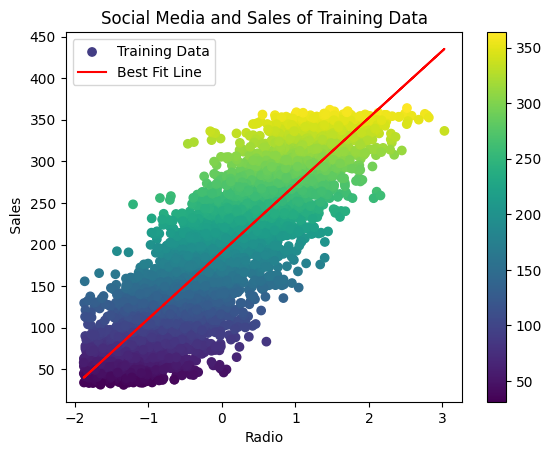

In [28]:
Linear_Regression_l2_reg_model = Ridge(alpha=0.3,max_iter=1000)
Linear_Regression_l2_reg_model.fit(x_train,y_train)

y_predicted_LR_L2 = Linear_Regression_l2_reg_model.predict(x_test)

weights_LR_L2 = Linear_Regression_l2_reg_model.coef_
bias_LR_L2 = Linear_Regression_l2_reg_model.intercept_

acc_LR_L2= Linear_Regression_l2_reg_model.score(x_test,y_test)
mse_LR_L2 = mean_squared_error(y_test,y_predicted_LR_L2)
mae_LR_L2 = mean_absolute_error(y_test,y_predicted_LR_L2)
med_ae_LR_L2 = median_absolute_error(y_test,y_predicted_LR_L2)


models_names.append('Linear Regression Ridge')
accuracies_of_models.append(acc_LR_L2*100)
mse_of_models.append(mse_LR_L2)
mae_of_models.append(mae_LR_L2)
med_ae_of_models.append(med_ae_LR_L2)

print('Weights : ' , weights_LR_L2)
print('Bias : ' , bias_LR_L2)
print('Predicted Labels  : ' , y_predicted_LR_L2[:10])
print('Accuracy : ' , acc_LR_L2*100)
print('Mean Square Error : ' , mse_LR_L2)
print('Mean Absolute Error : ' , mae_LR_L2)
print('Median Absolute Error : ' , med_ae_LR_L2)

plt.scatter(x_train[:,1],y_train,c=y_train,label='Training Data')
m,b=np.polyfit(x_train[:,1],y_train,1) # for draw best fit line , m is the slope of line and b is the intercopt for y axis
plt.plot(x_train[:,1],m*x_train[:,1]+b,color='red',label='Best Fit Line')
plt.xlabel('Radio')
plt.ylabel(' Sales')
plt.title('Social Media and Sales of Training Data')
plt.legend()
plt.colorbar()
plt.show()

Weights :  [ 9.28903338e+01 -5.97091811e-02  2.39263064e-02  4.62520510e-02]
Bias :  [191.71346138]
Predicted Labels  :  [ 92.3822591  156.44187213 185.0143456   92.29860248  49.62671508
 160.07246839  95.99179021 299.17167696 274.11975297  85.29936245]
Accuracy :  99.9063908990663
Mean Square Error :  7.793075686352099
Mean Absolute Error :  2.240904680435136
Median Absolute Error :  1.8871755582377006


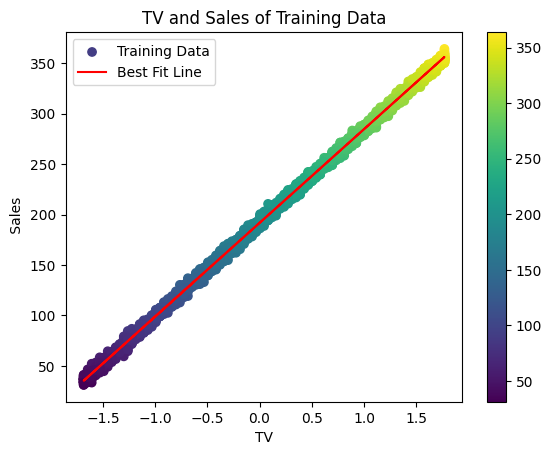

In [29]:
SGD_model = SGDRegressor(max_iter=1000,loss='squared_error',penalty='l2')
SGD_model.fit(x_train,y_train)

y_predicted_SGD = SGD_model.predict(x_test)

weights_SGD = SGD_model.coef_
bias_SGD = SGD_model.intercept_

acc_SGD= SGD_model.score(x_test,y_test)
mse_SGD = mean_squared_error(y_test,y_predicted_SGD)
mae_SGD = mean_absolute_error(y_test,y_predicted_SGD)
med_ae_SGD = median_absolute_error(y_test,y_predicted_SGD)


models_names.append('SGD Classifier')
accuracies_of_models.append(acc_SGD*100)
mse_of_models.append(mse_SGD)
mae_of_models.append(mae_SGD)
med_ae_of_models.append(med_ae_SGD)

print('Weights : ' , weights_SGD)
print('Bias : ' , bias_SGD)
print('Predicted Labels  : ' , y_predicted_SGD[:10])
print('Accuracy : ' , acc_SGD*100)
print('Mean Square Error : ' , mse_SGD)
print('Mean Absolute Error : ' , mae_SGD)
print('Median Absolute Error : ' , med_ae_SGD)

plt.scatter(x_train[:,0],y_train,c=y_train,label='Training Data')
m,b=np.polyfit(x_train[:,0],y_train,1) # for draw best fit line , m is the slope of line and b is the intercopt for y axis
plt.plot(x_train[:,0],m*x_train[:,0]+b,color='red',label='Best Fit Line')
plt.xlabel('TV')
plt.ylabel(' Sales')
plt.title('TV and Sales of Training Data')
plt.legend()
plt.colorbar()
plt.show()

In [30]:
SVR_Linear_Kernel_model = SVR(C=0.03,kernel='linear')
SVR_Linear_Kernel_model.fit(x_train,y_train)

y_predicted_SVR_Linear_Kernel = SVR_Linear_Kernel_model.predict(x_test)

weights_SVR_Linear_Kernel = SVR_Linear_Kernel_model.coef_
bias_SVR_Linear_Kernel = SVR_Linear_Kernel_model.intercept_

acc_SVR_Linear_Kernel= SVR_Linear_Kernel_model.score(x_test,y_test)
mse_SVR_Linear_Kernel = mean_squared_error(y_test,y_predicted_SVR_Linear_Kernel)
mae_SVR_Linear_Kernel = mean_absolute_error(y_test,y_predicted_SVR_Linear_Kernel)
med_ae_SVR_Linear_Kernel = median_absolute_error(y_test,y_predicted_SVR_Linear_Kernel)


models_names.append('SVR Linear Kernel ')
accuracies_of_models.append(acc_SVR_Linear_Kernel*100)
mse_of_models.append(mse_SVR_Linear_Kernel)
mae_of_models.append(mae_SVR_Linear_Kernel)
med_ae_of_models.append(med_ae_SVR_Linear_Kernel)

print('Weights : ' , weights_SVR_Linear_Kernel)
print('Bias : ' , bias_SVR_Linear_Kernel)
print('Predicted Labels  : ' , y_predicted_SVR_Linear_Kernel[:10])
print('Accuracy : ' , acc_SVR_Linear_Kernel*100)
print('Mean Square Error : ' , mse_SVR_Linear_Kernel)
print('Mean Absolute Error : ' , mae_SVR_Linear_Kernel)
print('Median Absolute Error : ' , med_ae_SVR_Linear_Kernel)

Weights :  [[60.30706692 22.57054283  3.68302602  0.16177057]]
Bias :  [191.45034287]
Predicted Labels  :  [105.00022963 172.571904   175.76840908 115.40699649  60.98437901
 154.96113105  86.81991522 259.3745916  269.80633343 111.60261113]
Accuracy :  96.68440642529947
Mean Square Error :  276.02734579324107
Mean Absolute Error :  13.452779625459593
Median Absolute Error :  11.978601526311053


In [31]:
SVR_rbf_Kernel_model = SVR(C=0.3,kernel='rbf')
SVR_rbf_Kernel_model.fit(x_train,y_train)

y_predicted_SVR_rbf_Kernel = SVR_rbf_Kernel_model.predict(x_test)

bias_SVR_rbf_Kernel = SVR_rbf_Kernel_model.intercept_

acc_SVR_rbf_Kernel= SVR_rbf_Kernel_model.score(x_test,y_test)
mse_SVR_rbf_Kernel = mean_squared_error(y_test,y_predicted_SVR_rbf_Kernel)
mae_SVR_rbf_Kernel = mean_absolute_error(y_test,y_predicted_SVR_rbf_Kernel)
med_ae_SVR_rbf_Kernel = median_absolute_error(y_test,y_predicted_SVR_rbf_Kernel)


models_names.append('SVR rbf Kernel ')
accuracies_of_models.append(acc_SVR_rbf_Kernel*100)
mse_of_models.append(mse_SVR_rbf_Kernel)
mae_of_models.append(mae_SVR_rbf_Kernel)
med_ae_of_models.append(med_ae_SVR_rbf_Kernel)


print('Bias : ' , bias_SVR_rbf_Kernel)
print('Predicted Labels  : ' , y_predicted_SVR_rbf_Kernel[:10])
print('Accuracy : ' , acc_SVR_rbf_Kernel*100)
print('Mean Square Error : ' , mse_SVR_rbf_Kernel)
print('Mean Absolute Error : ' , mae_SVR_rbf_Kernel)
print('Median Absolute Error : ' , med_ae_SVR_rbf_Kernel)

Bias :  [198.60020251]
Predicted Labels  :  [100.58341612 167.86557026 177.428795   113.20603967  82.82190772
 149.56256329 110.98013305 258.47146743 280.02514295 123.50876472]
Accuracy :  90.71033423488596
Mean Square Error :  773.3763884743847
Mean Absolute Error :  20.22898423209451
Median Absolute Error :  13.08550753967453


In [32]:
SVR_poly_Kernel_model = SVR(C=0.3,kernel='poly')
SVR_poly_Kernel_model.fit(x_train,y_train)

y_predicted_SVR_poly_Kernel = SVR_poly_Kernel_model.predict(x_test)

bias_SVR_poly_Kernel = SVR_poly_Kernel_model.intercept_

acc_SVR_poly_Kernel= SVR_poly_Kernel_model.score(x_test,y_test)
mse_SVR_poly_Kernel = mean_squared_error(y_test,y_predicted_SVR_poly_Kernel)
mae_SVR_poly_Kernel = mean_absolute_error(y_test,y_predicted_SVR_poly_Kernel)
med_ae_SVR_poly_Kernel = median_absolute_error(y_test,y_predicted_SVR_poly_Kernel)


models_names.append('SVR poly Kernel')
accuracies_of_models.append(acc_SVR_poly_Kernel*100)
mse_of_models.append(mse_SVR_poly_Kernel)
mae_of_models.append(mae_SVR_poly_Kernel)
med_ae_of_models.append(med_ae_SVR_poly_Kernel)


print('Bias : ' , bias_SVR_poly_Kernel)
print('Predicted Labels  : ' , y_predicted_SVR_poly_Kernel[:10])
print('Accuracy : ' , acc_SVR_poly_Kernel*100)
print('Mean Square Error : ' , mse_SVR_poly_Kernel)
print('Mean Absolute Error : ' , mae_SVR_poly_Kernel)
print('Median Absolute Error : ' , med_ae_SVR_poly_Kernel)

Bias :  [186.69544983]
Predicted Labels  :  [145.24305285 178.4703829  180.22637535 135.60323827  76.96866425
 180.93744553 117.0633998  228.39495037 213.99585849 145.54110264]
Accuracy :  82.17216544764625
Mean Square Error :  1484.1897059628961
Mean Absolute Error :  31.961168287953406
Median Absolute Error :  29.185140833270985


In [33]:
Decition_Tree_model = DecisionTreeRegressor(max_depth=2,criterion='squared_error')
Decition_Tree_model.fit(x_train,y_train)

y_predicted_DT = Decition_Tree_model.predict(x_test)


acc_DT= Decition_Tree_model.score(x_test,y_test)
mse_DT = mean_squared_error(y_test,y_predicted_DT)
mae_DT = mean_absolute_error(y_test,y_predicted_DT)
med_ae_DT = median_absolute_error(y_test,y_predicted_DT)


models_names.append('Decition Tree')
accuracies_of_models.append(acc_DT*100)
mse_of_models.append(mse_DT)
mae_of_models.append(mae_DT)
med_ae_of_models.append(med_ae_DT)

print('Predicted Labels  : ' , y_predicted_DT[:10])
print('Accuracy : ' , acc_DT*100)
print('Mean Square Error : ' , mse_DT)
print('Mean Absolute Error : ' , mae_DT)
print('Median Absolute Error : ' , med_ae_DT)

Predicted Labels  :  [ 72.46250884 152.16683836 152.16683836  72.46250884  72.46250884
 152.16683836  72.46250884 317.08287701 234.38423177  72.46250884]
Accuracy :  93.70880795910924
Mean Square Error :  523.7496700962489
Mean Absolute Error :  19.8244152062528
Median Absolute Error :  18.90814345271304


In [34]:
KNN_model = KNeighborsRegressor(n_neighbors=100)
KNN_model.fit(x_train,y_train)

y_predicted_KNN = KNN_model.predict(x_test)

acc_KNN= KNN_model.score(x_test,y_test)
mse_KNN = mean_squared_error(y_test,y_predicted_KNN)
mae_KNN = mean_absolute_error(y_test,y_predicted_KNN)
med_ae_KNN = median_absolute_error(y_test,y_predicted_KNN)


models_names.append('KNN Classifier')
accuracies_of_models.append(acc_KNN*100)
mse_of_models.append(mse_KNN)
mae_of_models.append(mae_KNN)
med_ae_of_models.append(med_ae_KNN)

print('Predicted Labels  : ' , y_predicted_KNN[:10])
print('Accuracy : ' , acc_KNN*100)
print('Mean Square Error : ' , mse_KNN)
print('Mean Absolute Error : ' , mae_KNN)
print('Median Absolute Error : ' , med_ae_KNN)

Predicted Labels  :  [ 98.24335921 167.9296409  172.21225162 105.70759785  65.12184299
 151.90948362  83.60026516 270.8082563  274.21611114 107.14430363]
Accuracy :  96.92110593180462
Mean Square Error :  256.32181341746224
Mean Absolute Error :  12.762476409229095
Median Absolute Error :  10.79611140299997


In [35]:
Random_Forest_model = RandomForestRegressor(n_estimators=100,max_depth=3)
Random_Forest_model.fit(x_train,y_train)


y_predicted_RF = Random_Forest_model.predict(x_test)


acc_RF= Random_Forest_model.score(x_test,y_test)
mse_RF = mean_squared_error(y_test,y_predicted_RF)
mae_RF = mean_absolute_error(y_test,y_predicted_RF)
med_ae_RF = median_absolute_error(y_test,y_predicted_RF)


models_names.append('Random Forest ')
accuracies_of_models.append(acc_RF*100)
mse_of_models.append(mse_RF)
mae_of_models.append(mae_RF)
med_ae_of_models.append(med_ae_RF)

print('Predicted Labels  : ' , y_predicted_RF[:10])
print('Accuracy : ' , acc_RF*100)
print('Mean Square Error : ' , mse_RF)
print('Mean Absolute Error : ' , mae_RF)
print('Median Absolute Error : ' , med_ae_RF)

Predicted Labels  :  [ 93.38613903 167.86686211 173.35588099  93.38613903  54.27954914
 172.20083888  93.38613903 296.68915665 271.29060648  93.38613903]
Accuracy :  98.93582997758426
Mean Square Error :  88.59349619975076
Mean Absolute Error :  7.956626224733542
Median Absolute Error :  7.770997683891608


In [36]:
Gradient_Boosting_model = GradientBoostingRegressor(n_estimators=10,max_depth=3,loss='squared_error')
Gradient_Boosting_model.fit(x_train,y_train)

y_predicted_GB = Gradient_Boosting_model.predict(x_test)

acc_GB= Gradient_Boosting_model.score(x_test,y_test)
mse_GB = mean_squared_error(y_test,y_predicted_GB)
mae_GB = mean_absolute_error(y_test,y_predicted_GB)
med_ae_GB = median_absolute_error(y_test,y_predicted_GB)


models_names.append('Gradient Boosting Classifier')
accuracies_of_models.append(acc_GB*100)
mse_of_models.append(mse_GB)
mae_of_models.append(mae_GB)
med_ae_of_models.append(med_ae_GB)

print('Predicted Labels  : ' , y_predicted_GB[:10])
print('Accuracy : ' , acc_GB*100)
print('Mean Square Error : ' , mse_GB)
print('Mean Absolute Error : ' , mae_GB)
print('Median Absolute Error : ' , med_ae_GB)

Predicted Labels  :  [125.77746626 168.38975788 185.28892515 125.77746626  99.14635217
 170.59076307 127.66414961 261.20724448 246.14320498 125.77746626]
Accuracy :  87.3824683273003
Mean Square Error :  1050.425421454747
Mean Absolute Error :  27.98678970337351
Median Absolute Error :  27.5263020347317


In [37]:
Neural_Network_model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(100,100,50),solver='adam',activation='identity')
Neural_Network_model.fit(x_train,y_train)

y_predicted_NN = Neural_Network_model.predict(x_test)


acc_NN= Neural_Network_model.score(x_test,y_test)
mse_NN = mean_squared_error(y_test,y_predicted_NN)
mae_NN = mean_absolute_error(y_test,y_predicted_NN)
med_ae_NN = median_absolute_error(y_test,y_predicted_NN)


models_names.append('Neural Network ')
accuracies_of_models.append(acc_NN*100)
mse_of_models.append(mse_NN)
mae_of_models.append(mae_NN)
med_ae_of_models.append(med_ae_NN)

print('Predicted Labels  : ' , y_predicted_LR[:10])
print('Accuracy : ' , acc_NN*100)
print('Mean Square Error : ' , mse_NN)
print('Mean Absolute Error : ' , mae_NN)
print('Median Absolute Error : ' , med_ae_NN)

Predicted Labels  :  [ 92.38579584 156.41919449 185.04453084  92.28824168  49.65737579
 160.10104314  96.05397083 299.20869527 274.07961929  85.25359232]
Accuracy :  99.90588009059658
Mean Square Error :  7.835601135544213
Mean Absolute Error :  2.2436128627122116
Median Absolute Error :  1.8731692708353904


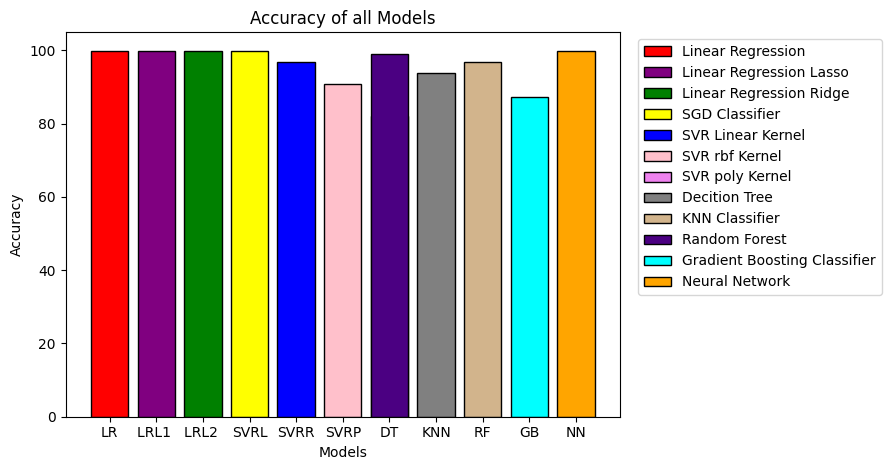

In [38]:
plt.bar(['LR', 'LRL1 ', 'LRL2 ', 'SVRL', 'SVRR', 'SVRP', 'DT', 'KNN', 'RF', 'DT', 'GB','NN'],
        accuracies_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange','brown'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()

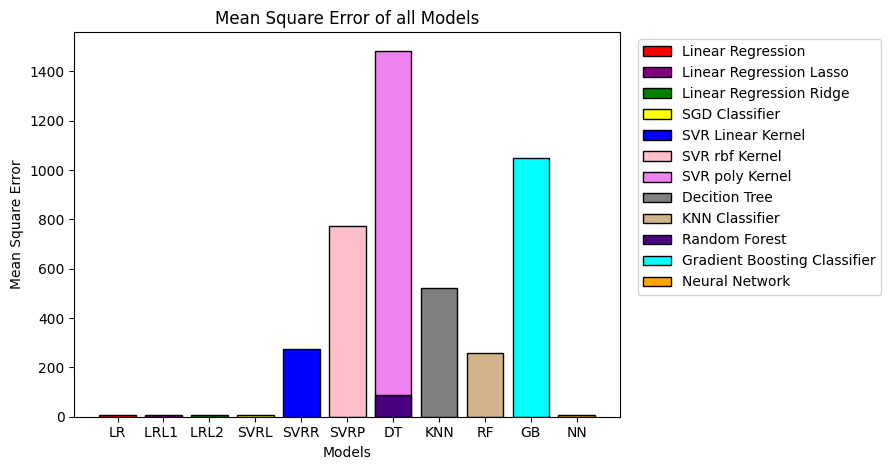

In [39]:
plt.bar(['LR', 'LRL1 ', 'LRL2 ', 'SVRL', 'SVRR', 'SVRP', 'DT', 'KNN', 'RF', 'DT', 'GB','NN'],
        mse_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange','brown'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()

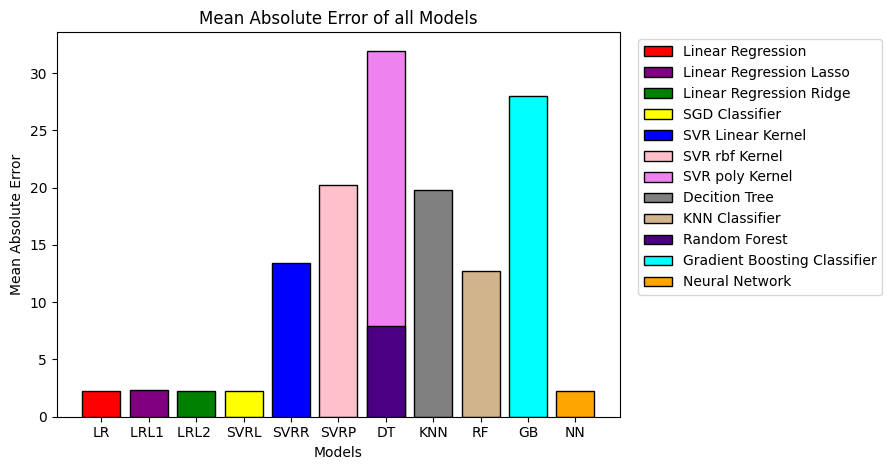

In [40]:
plt.bar(['LR', 'LRL1 ', 'LRL2 ', 'SVRL', 'SVRR', 'SVRP', 'DT', 'KNN', 'RF', 'DT', 'GB','NN'],
        mae_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange','brown'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()

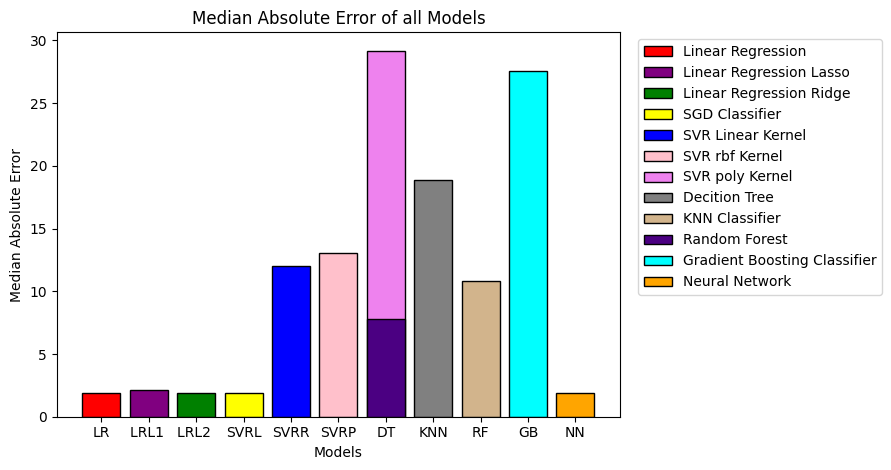

In [41]:
plt.bar(['LR', 'LRL1 ', 'LRL2 ', 'SVRL', 'SVRR', 'SVRP', 'DT', 'KNN', 'RF', 'DT', 'GB','NN'],
        med_ae_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange','brown'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Median Absolute Error')
plt.title('Median Absolute Error of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()